# Mturk Data Visualizations

In [2]:
import plotly
import pandas as pd
import plotly.express as px
from collections import defaultdict
import pprint

### MTurk Data from Sandbox

In [4]:
df = pd.read_csv("HITResultsForPetalBinaryLabeling.csv")

### Fraction of HITs with assignments 

##### Each paper will be labeled by a maximum of three workers so this bar chart demonstrates how many papers have zero, one, two, or three labels

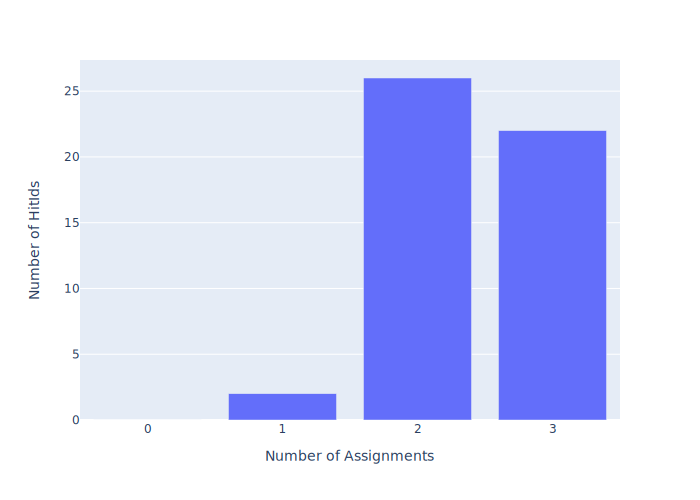

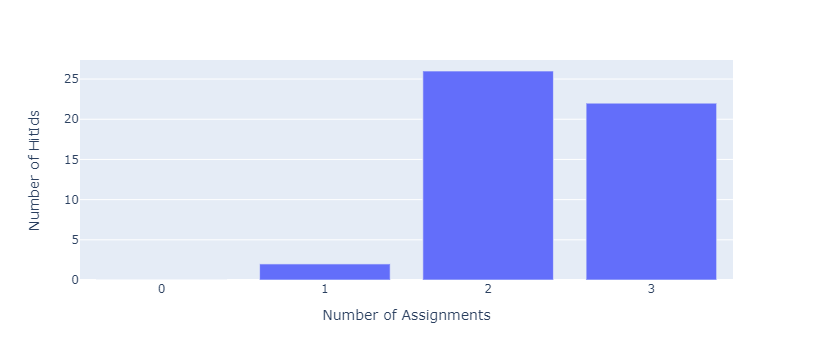

In [15]:
HitIdAssignments = (df['HitId'].value_counts())
xvalues = []
yvalues = []
for x in range(4):
    xvalues.append(str(x))
    yvalues.append(list(HitIdAssignments).count(x))
fig = px.bar(x = xvalues, y = yvalues, labels={'x':'Number of Assignments', 'y': 'Number of HitIds'})
fig.show("svg")
fig

### Status of Labeling

##### Shows how well we are doing approving assignments and which papers have been submitted, approved, and rejected

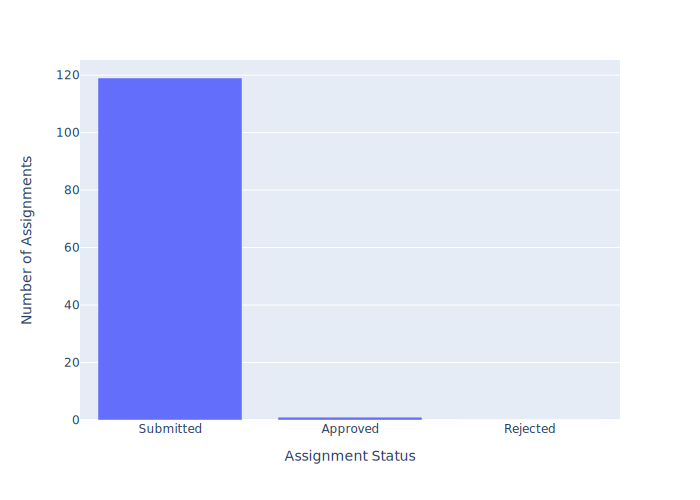

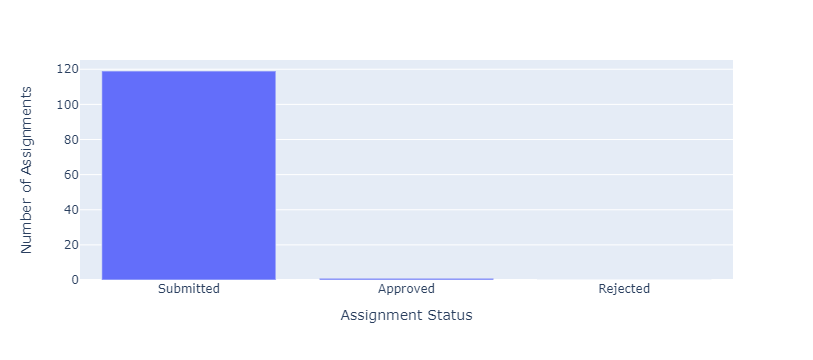

In [14]:
assignment_status = df['Status']
xvalues2 = []
yvalues2 = []
for x in ["Submitted", "Approved", "Rejected"]:
    xvalues2.append(x)
    yvalues2.append(list(assignment_status).count(x))
fig2 = px.bar(x = xvalues2, y = yvalues2, labels={'x':'Assignment Status', 'y': 'Number of Assignments'})
fig2.show("svg")
fig2

### Workers

##### Shows a distribution of who is doing the work

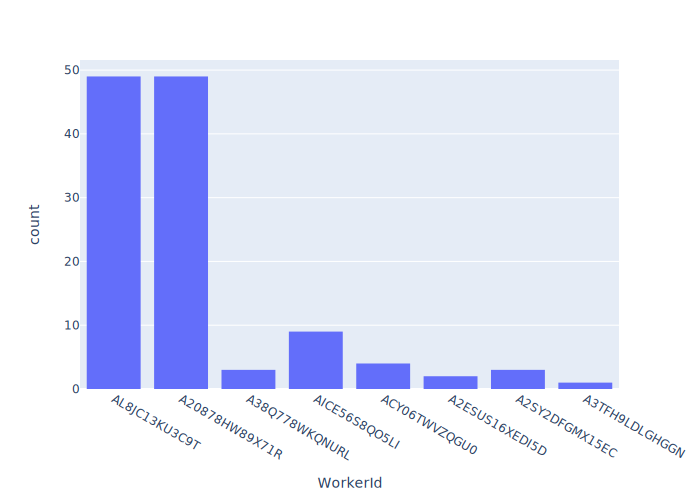

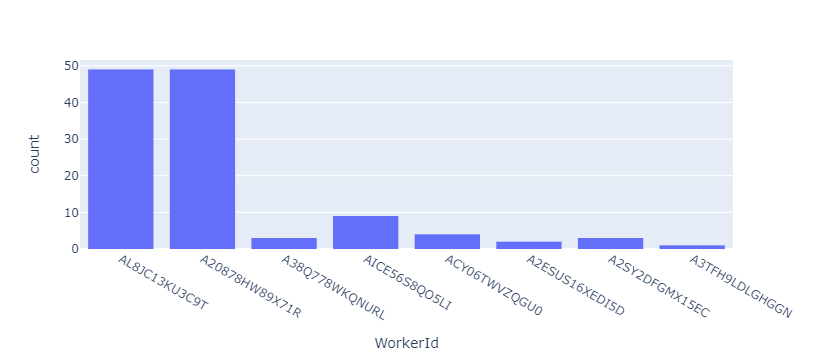

In [13]:
fig4 = px.histogram(df, x="WorkerId")
fig4.show("svg")
fig4

### Labeling Status

##### How often workers label papers "Yes," "No," or "Not sure (skip)"

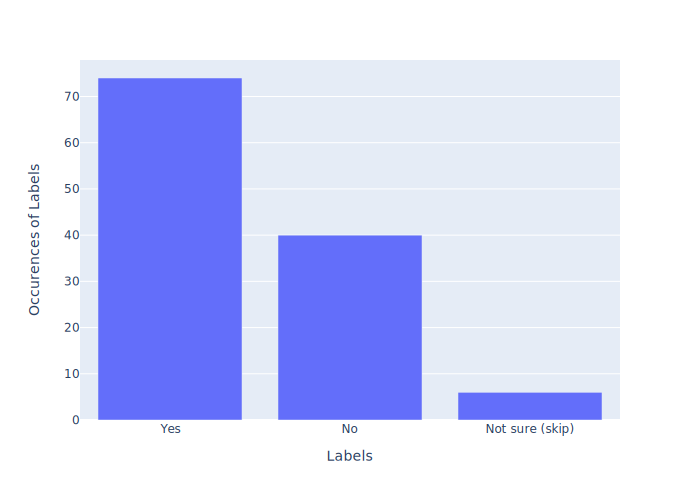

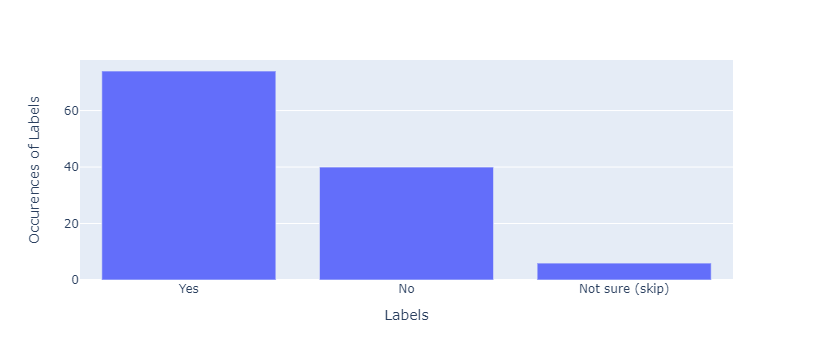

In [12]:
xvalues3 = []
yvalues3 = []
labels = df['category.labels']
for x in ["Yes", "No", "Not sure (skip)"]:
    xvalues3.append(x)
    yvalues3.append(list(labels).count(f'["{x}"]'))
fig3 = px.bar(x = xvalues3, y = yvalues3, labels={'x':'Labels', 'y': 'Occurences of Labels'})
fig3.show("svg")
fig3

### Consistency of Results

##### If a paper is labeled as all "Yes" or all "No" it is considered consistent. If not, it is inconsistent. This does not include "Not sure (skip)."

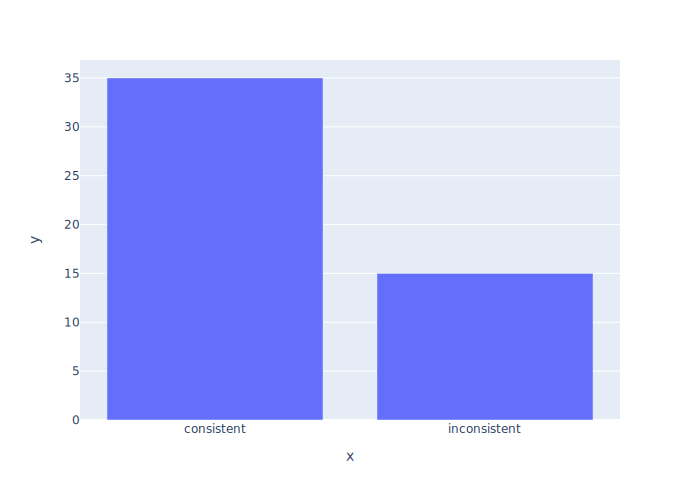

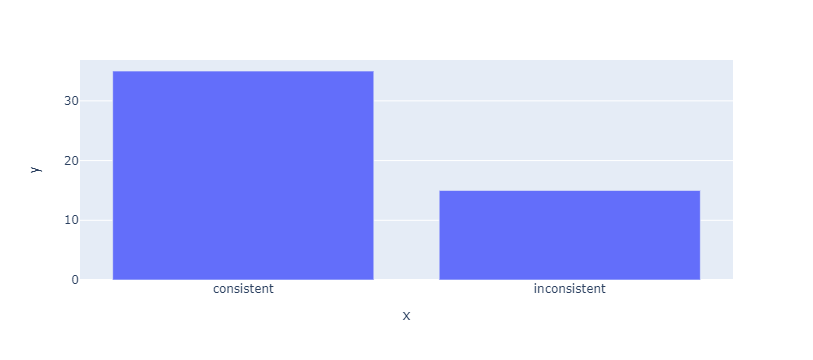

In [11]:
label_counter = defaultdict(defaultdict)
for index, row in df.iterrows():
    hit_id = row["HitId"]
    label = row["category.labels"][2:-2]
    if label != "Not sure (skip)":
        label_counter[hit_id] [label] = 1 + label_counter[hit_id].get(label, 0)
labels_count = []
for hit_id, label_dict in label_counter.items():
    labels_count.append(len(label_dict))
fig5 = px.bar( x = ["consistent", "inconsistent"], y = [labels_count.count(1), labels_count.count(2) + labels_count.count(3)])
fig5.show("svg")
fig5